## Problem Statement/Goal
 - 
 Using Beautiful Soup, scrape [ChubbyGrub.com](http://chubbygrub.com), and create a DataFrame of food items from every restaurant. Your DataFrame should look something like this:

| restaurant | category | name    | calories | carbs | fat |
|------------|----------|---------|----------|-------|-----|
| McDonald's | Burgers  | Big Mac | 540      | 45    | 29  |
| Burger King | Burgers  | Whopper | 900      | 51    | 57  |
| ... | ...  | ... | ...      | ...    | ...  |
| Chili's | Ribs  | Shiner Bock® BBQ Ribs | 2310      | 168    | 123  |


**Note**: Your DataFrame should have just over 4,900 rows

## Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

## Data Collection

In [7]:
raw_df = pd.read_csv('./data/fast_foods_01_21_2019')

## Initial Viewing of Data

In [8]:
df = raw_df.drop(columns = 'url')

In [9]:
df['Category'] = df['Category'].fillna('Desserts')

In [10]:
df.head()

,Calories,Carbs,Category,Cholesterol,Fat,Fiber,Protein,Restaurant,Saturated Fat,Sodium,Sugars,Trans Fat,name
0,0,0 g,Drinks,0 mg,0 g,0 g,0 g,A&W Restaurants,0 g,30 mg,0 g,0 g,A&W® Diet Root Beer
1,0,0 g,Drinks,0 mg,0 g,0 g,0 g,A&W Restaurants,0 g,40 mg,0 g,0 g,A&W® Diet Root Beer
2,0,0 g,Drinks,0 mg,0 g,0 g,0 g,A&W Restaurants,0 g,50 mg,0 g,0 g,A&W® Diet Root Beer
3,0,0 g,Drinks,0 mg,0 g,0 g,0 g,A&W Restaurants,0 g,80 mg,0 g,0 g,A&W® Diet Root Beer
4,0,0 g,Drinks,0 mg,0 g,0 g,0 g,A&W Restaurants,0 g,160 mg,0 g,0 g,A&W® Diet Root Beer


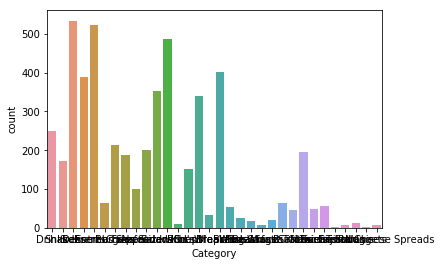

In [8]:
sns.countplot(df['Category']);

In [11]:
df['Category'].value_counts()

Sides                   534
Entrees                 524
Sandwiches              488
Breakfast               402
Desserts                389
Salads                  353
Kid's Meals             340
Drinks                  250
Burgers                 214
Appetizers              200
Coffee                  195
Chicken                 187
Shakes                  171
Soups                   152
Seafood                 100
Breakfast Sandwiches     65
French Fries             65
Mexican Food             56
Breads                   53
Tacos                    49
Burritos                 47
Wraps                    32
Pizzas                   24
Breakfast Tacos          21
Wing Sauces              17
Paninis                  12
Ribs                     10
Wings                     7
Tortillas                 7
Cream Cheese Spreads      6
Fajitas                   3
Nuggets                   3
Name: Category, dtype: int64

In [5]:
df.isna().sum()

Calories            0
Carbs               0
Category            0
Cholesterol      1358
Fat                 0
Fiber               1
Protein             4
Restaurant          0
Saturated Fat     479
Sodium             37
Sugars           1541
Trans Fat        1038
name                0
dtype: int64

In [8]:
mask = df['Protein'].isna()
df[mask]

,Calories,Carbs,Category,Cholesterol,Fat,Fiber,Protein,Restaurant,Saturated Fat,Sodium,Sugars,Trans Fat,name
3980,680,5 g,Sandwiches,15 mg,28 g,8 g,NaN,Quiznos,14 g,1820 mg,46 g,NaN,Basil Pesto Chicken (Large)
3981,380,3 g,Sandwiches,10 mg,16 g,5 g,NaN,Quiznos,8 g,1020 mg,24 g,NaN,Basil Pesto Chicken (Small)
4028,790,3 g,Sandwiches,95 mg,45 g,10 g,NaN,Quiznos,13 g,2400 mg,35 g,NaN,Little Italy (Large)
4029,480,2 g,Sandwiches,60 mg,28 g,6 g,NaN,Quiznos,9 g,1520 mg,22 g,NaN,Little Italy (Small)


In [4]:
plt.hist(df['Calories'], bins)

TypeError: hist2d() missing 1 required positional argument: 'y'

## Cleaning

## Code Recycling Bin
- For when I'm not sure I'm ready to delete some old code yet.

In [12]:
import antigravity

In [86]:
test_row   = test_soup.find_all('tr')[2]#.find_all('td')[3]#.text
test_cells = test_row.find_all('td')
test_dict = {
    'name'        : test_cells[0].text,
    'category'    : test_cells[1],
    'calories'    : test_cells[2],
    'Fat Content' : test_cells[3],
    'Carbs'       : test_cells[4],
    'deets page'   : test_cells[5].find('a').attrs['href']
}
#for num in test_cells:
#    print(num.text)
test_dict

{'page': 'http://chubbygrub.com/food/6-bacon-egg-and-cheese-omelet-sandwich/'}

In [9]:
# Original code that was used to gether the b
items = []
for place in establishments:
    print(place['name'])
    res_taurant = requests.get('http://chubbygrub.com/restaurants/' + place['href'])
    res_soup    = BeautifulSoup(res_taurant.content, 'lxml')
    for row in res_soup.find_all('tr'):
        cells_in_row = row.find_all('td')
        if len(cells_in_row) < 6:
            pass
        else:
            temp_dict = {
                'name'        : cells_in_row[0].text,
                'category'    : cells_in_row[1].text.strip('\n'),
                'calories'    : cells_in_row[2].text,
                'fat_content' : cells_in_row[3].text,
                'carbs'       : cells_in_row[4].text,
                'deets_url'   : cells_in_row[5].find('a').attrs['href']
            }
            items.append(temp_dict)

A&W Restaurants
Applebee's
Arby's
Atlanta Bread Company
Bojangle's Famous Chicken 'n Biscuits
Buffalo Wild Wings
Burger King
Captain D's
Carl's Jr.
Charley's Grilled Subs
Chick-fil-A
Chili's
Chipotle Mexican Grill
Church's
Corner Bakery Cafe
Dairy Queen
Denny's
El Pollo Loco
FATZ
Fazoli's
Five Guys Burgers and Fries
Golden Chick
Hardee's
IHOP
In-N-Out Burger
Jack in the Box
Jimmy Johns
Joe's Crab Shack
KFC
McDonald's
O'Charley's
Olive Garden
Outback Steakhouse
Panda Express
Panera Bread
Popeye's
Quiznos
Red Robin Gourmet Burgers
Romano's Macaroni Grill
Ruby Tuesday
Subway
Taco Bell
Taco Bueno
Wendy's


In [175]:
count = -1
for item in items:
    count += 1
    if len(item) > 8:
        #print('Searching...',count)
        pass
    else:
        print(count, 'Expanding', item['name'])
        item_page = requests.get(item['deets_url'])
        item_soup = BeautifulSoup(item_page.content, 'lxml')
        sleep(1)
        for i in test_item_soup.find_all('tr'):
            item[str(i.find('th').text)] = i.find('td').text

3505 Expanding Shrimp & Crab Tortelli Romana
3506 Expanding Shrimp Mezzaluna
3507 Expanding Shrimp Primavera
3508 Expanding Shrimp Primavera
3509 Expanding Shrimp Scampi Fritta
3510 Expanding Sicilian Scampi
3511 Expanding Small Shells
3512 Expanding Smoked Mozzarella Fonduta
3513 Expanding Spaghetti
3514 Expanding Spaghetti & Italian Sausage
3515 Expanding Spaghetti & Italian Sausage
3516 Expanding Spaghetti & Meatballs
3517 Expanding Spaghetti & Meatballs
3518 Expanding Spaghetti with Meat Sauce
3519 Expanding Spaghetti with Meat Sauce
3520 Expanding Steak Gorgonzola-Alfredo
3521 Expanding Steak Toscano
3522 Expanding Steak Toscano
3523 Expanding Steamed Broccoli
3524 Expanding Strawberry & White Chocolate Cream Cake
3525 Expanding Strawberry Smoothie
3526 Expanding Stuffed Chicken Marsala
3527 Expanding Stuffed Mushrooms
3528 Expanding Sundae
3529 Expanding Tiramisu
3530 Expanding Tomato Sauce
3531 Expanding Tour of Italy
3532 Expanding Tour of Italy
3533 Expanding Triple Chocolate 

3687 Expanding Wood-Fire Grilled Pork Chop
3688 Expanding BBQ Pork
3689 Expanding Beijing Beef™
3690 Expanding Black Pepper Chicken
3691 Expanding Broccoli Beef
3692 Expanding Chicken Egg Roll
3693 Expanding Chicken Potsticker
3694 Expanding Chow Mein
3695 Expanding Cream Cheese Rangoon
3696 Expanding Crispy Shrimp
3697 Expanding Eggplant & Tofu
3698 Expanding Fortune Cookies
3699 Expanding Fried Rice
3700 Expanding Golden Treasure Shrimp™
3701 Expanding Honey Walnut Shrimp
3702 Expanding Hot & Sour Soup
3703 Expanding Kobari™ Beef
3704 Expanding Kung Pao Chicken
3705 Expanding Mandarin Chicken
3706 Expanding Mixed Veggies (Entree)
3707 Expanding Mixed Veggies (Side)
3708 Expanding Mushroom Chicken
3709 Expanding Orange Chicken
3710 Expanding Peppercorn Shrimp
3711 Expanding Potato Chicken
3712 Expanding Steamed Rice
3713 Expanding String Bean Chicken Breast
3714 Expanding Sweet & Sour Chicken Breast
3715 Expanding Sweet & Sour Pork
3716 Expanding SweetFire Chicken Breast™
3717 Expandi

3891 Expanding Oatmeal Raisin
3892 Expanding Orange Juice – Large
3893 Expanding Orange Juice – Small
3894 Expanding Orange Scones
3895 Expanding Orange- mini Scones
3896 Expanding Organic Apple Juice
3897 Expanding Organic Chocolate Milk
3898 Expanding Organic Milk
3899 Expanding Panera Kids Deli Sandwich – Roast Beef
3900 Expanding Panera Kids Deli Sandwich – Smoked Ham
3901 Expanding Panera Kids Deli Sandwich – Smoked Turkey
3902 Expanding Panera Kids Grilled Cheese Sandwich
3903 Expanding Panera Kids Mac & Cheese
3904 Expanding Panera Kids Organic Yogurt (blueberry, strawberry)
3905 Expanding Panera Kids Peanut Butter & Jelly Sandwich
3906 Expanding Panera potato chips
3907 Expanding Pastry Ring – Apple Cherry Cheese
3908 Expanding Pecan Braid Pastries
3909 Expanding Pecan Roll
3910 Expanding Pickle spear
3911 Expanding Plain
3912 Expanding Plain
3913 Expanding Plain
3914 Expanding Pumpkin Muffie
3915 Expanding Pumpkin Muffin
3916 Expanding Reduced Fat Hazelnut
3917 Expanding Reduc

4107 Expanding Clam Strips
4108 Expanding Classic Banana Malt
4109 Expanding Classic Banana Milkshake
4110 Expanding Classic Chocolate Malt
4111 Expanding Classic Chocolate Milkshake
4112 Expanding Classic Creamy Mac ‘N’ Cheese
4113 Expanding Classic Creamy Mac n Cheese
4114 Expanding Classic Mint Brownie Shake
4115 Expanding Classic Mojito
4116 Expanding Classic Peach Malt
4117 Expanding Classic Peach Milkshake
4118 Expanding Classic Raspberry Malt
4119 Expanding Classic Raspberry Milkshake
4120 Expanding Classic Rookie Magic Shake
4121 Expanding Classic Strawberry Malt
4122 Expanding Classic Strawberry Milkshake
4123 Expanding Classic Vanilla Malt
4124 Expanding Classic Vanilla Milkshake
4125 Expanding Clucks & Fries
4126 Expanding Clucks & Shrimp Combo
4127 Expanding Coleslaw
4128 Expanding Creamy Spinach & Artichoke Dip
4129 Expanding Crispy Arctic Cod Sandwich
4130 Expanding Crispy Chicken Sandwich
4131 Expanding Crispy Chicken Tender Salad
4132 Expanding Electric Watermelon
4133 

4325 Expanding Garlic Cream Sauce
4326 Expanding Gelato: Dark Chocolate
4327 Expanding Gelato: Double Vanilla
4328 Expanding Ginger Root Soda
4329 Expanding Gluten-Free Penne
4330 Expanding Goat Cheese Peppadew Peppers
4331 Expanding Grilled Chicken & Pasta
4332 Expanding Grilled Chicken Spiedini
4333 Expanding Grilled King Salmon
4334 Expanding Grilled Shrimp Spiedini
4335 Expanding Half Caprese Panini
4336 Expanding Half Roasted Turkey
4337 Expanding Homemade Chocolate Cake
4338 Expanding Italian Mojito
4339 Expanding Italian Sausage
4340 Expanding Italian Sausage Pizza
4341 Expanding Lasagna Bolognese
4342 Expanding Lemon Passion
4343 Expanding Lentil Soup
4344 Expanding Lentil Soup
4345 Expanding Light Beer – 12 Ounces
4346 Expanding Limonata Nojito
4347 Expanding Lobster Ravioli
4348 Expanding Mac & Cheese
4349 Expanding Mac & Cheese Bites, Truffle Dip
4350 Expanding Mama’S Trio
4351 Expanding Margarita Prima
4352 Expanding Margherita Pizza
4353 Expanding Market Chop (Includes Dre

4539 Expanding Honest Kids Super Fruit Punch
4540 Expanding Italian Cream Cake
4541 Expanding Jamaican Jerk Shrimp
4542 Expanding Jumbo Lump Crab Burger
4543 Expanding Jumbo Lump Crab Cake
4544 Expanding Jumbo Lump Crab Cake – F&T
4545 Expanding Jumbo Shrimp Skewer add-on – 1 skewer
4546 Expanding Jumbo Shrimp Skewer add-on – 2 skewers
4547 Expanding Jumbo Skewered Shrimp
4548 Expanding Kid Beef Minis
4549 Expanding Kid Chicken Breast
4550 Expanding Kid Chicken Tenders
4551 Expanding Kid Chop Steak
4552 Expanding Kid Fried Shrimp
4553 Expanding Kid Grilled Cheese
4554 Expanding Kid Mac ‘n Cheese
4555 Expanding Kid Pasta Marinara
4556 Expanding Kid Pasta Marinara (with linguini)
4557 Expanding Kid Side of Apples
4558 Expanding Kid Side of Grapes
4559 Expanding Kid Side of White Cheddar Mashed Potatoes
4560 Expanding Kid Sundae
4561 Expanding Kid Turkey Minis
4562 Expanding Kids Eggscellent Combo
4563 Expanding Kids French Toast
4564 Expanding Kids Patty Cakes
4565 Expanding Large Fried 

4732 Expanding Turkey Breast & Ham Salad
4733 Expanding Turkey Breast Mini Sub
4734 Expanding Turkey Breast Salad
4735 Expanding Turkey Jalapeno Melt Salad
4736 Expanding Tuscan Chicken Salad
4737 Expanding Vegetable Beef (8 oz)
4738 Expanding Veggie Delite® Mini Sub
4739 Expanding Veggie Delite® Salad
4740 Expanding Veggie Flatizza™
4741 Expanding White Macadamia Nut Cookie
4742 Expanding 1/2 lb.* Cheesy Potato Burrito
4743 Expanding 1/2 lb.* Combo Burrito
4744 Expanding 7-Layer Burrito
4745 Expanding Bean Burrito
4746 Expanding Bean Burrito
4747 Expanding Beefy 5-Layer Burrito
4748 Expanding Beefy 5-Layer Burrito
4749 Expanding Berry Pomegranate Frutista Freeze®
4750 Expanding Berry Pomegranate Frutista Freeze® 16 oz
4751 Expanding Burrito Supreme® – Beef
4752 Expanding Burrito Supreme® – Chicken
4753 Expanding Burrito Supreme® – Steak
4754 Expanding Caramel Apple Empanada
4755 Expanding Caramel Apple Empanada
4756 Expanding Chalupa Supreme – Chicken
4757 Expanding Chalupa Supreme – 

4944 Expanding Jr. Original Chocolate Frosty™
4945 Expanding Jr. Vanilla Frosty™
4946 Expanding Kids’ Cheeseburger
4947 Expanding Kids’ French Fries
4948 Expanding Kids’ Hamburger
4949 Expanding Large Caramel Frosty™ Shake
4950 Expanding Large Chili
4951 Expanding Large Chocolate Frosty™ Shake
4952 Expanding Large French Fries
4953 Expanding Large Original Chocolate Frosty™
4954 Expanding Large Strawberry Frosty™ Shake
4955 Expanding Large Vanilla Frosty™
4956 Expanding Medium French Fries
4957 Expanding Medium Original Chocolate Frosty™
4958 Expanding Medium Vanilla Frosty™
4959 Expanding Premium Cod Fillet Sandwich
4960 Expanding Small Caramel Frosty™ Shake
4961 Expanding Small Chili
4962 Expanding Small Chocolate Frosty™ Shake
4963 Expanding Small French Fries
4964 Expanding Small Original Chocolate Frosty™
4965 Expanding Small Strawberry Frosty™ Shake
4966 Expanding Small Vanilla Frosty™
4967 Expanding Son of Baconator®
4968 Expanding Sour Cream and Chive Potato
4969 Expanding Spic